### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2 - SOLUTION</span>


All c++ code is stored into exercize_xx/es_xx.x.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

In [72]:
# Common libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

Data:

| throws | blocks | 
|--------|--------|
| $10^4$ | $10^2$ |

<font color="black">1. Sampling a uniform distribution in $[0,1]$. Show a picture of both your estimations of $I$ and their uncertainties with a large number of throws as a function of the number of blocks</font>.

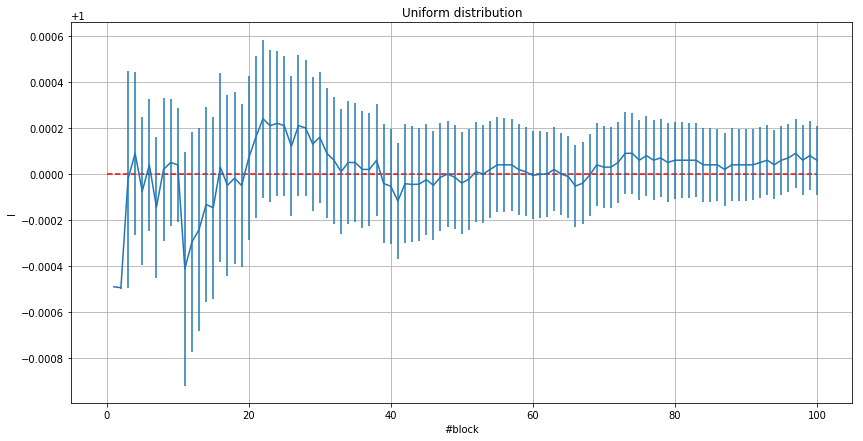

In [73]:
# To read data from file
x1, y1, err_prog1 = np.loadtxt("data/output_es02.1.1.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.errorbar(x1,y1,yerr=err_prog1)
plt.title("Uniform distribution")
plt.xlabel('#block')
plt.ylabel('I')
plt.grid(True)
plt.show()


<font color="black">2. Using importance sampling.

To perform importance sampling I need to find a distribution function $p(x)$ that approximate our integrand $g(x)=\cos(\pi/2x)$, and then evaluate the integral
$$I=\int_0^1 \frac{g(x)}{p(x)}p(x) $$<br />
sampling $x$ from $p(x)$.<br />
I use a simple $p(x)$ linear funciton that approximate better our integrand $$p(x)=2(1-x)$$<br />
defined in the interval $[0,1]$, sampling $x$ from
$$x=1-\sqrt{1-y}$$<br /> with y sampled from uniform distribution.<br />

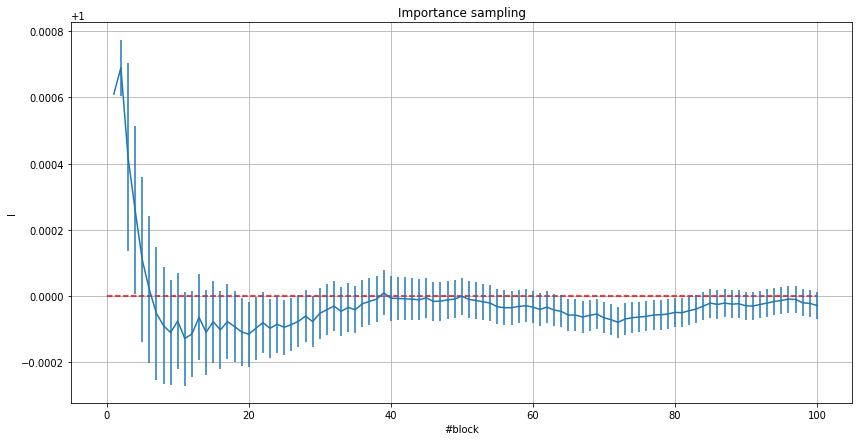

In [74]:
# To read data from file
x, y, err_prog = np.loadtxt("data/output_es02.1.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(14,7))
plt.hlines(1, 0, 100, colors='r', linestyles='dashed')
plt.errorbar(x,y,yerr=err_prog)
plt.title("Importance sampling")
plt.xlabel('#block')
plt.ylabel('I')
plt.grid(True)
plt.show()

It seems to works properly, as the variance is smaller than the uniform sampling and better approximate the integral.

### Exercise 02.2
- 3D Random Walks (RW) on a cubic lattice and in the continuum: repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin and show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$. Then try to fit the results with $f(N)=k\sqrt{N}$.


In [78]:
from scipy.optimize import curve_fit

# Defining function to optimize for fitting histograms
def diffusive(x,k):  
    return k * np.sqrt(x)

<span style="color:black">1. On a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$. </font>


k=1.005882161348828


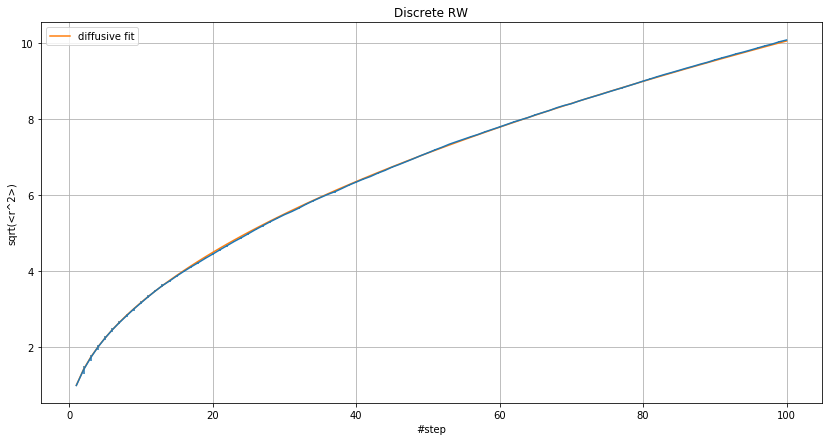

In [79]:
x, y, err = np.loadtxt("data/output_es02.2.1.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])
# Print k
print('k='+str(p_opt[0]))

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Discrete RW")
plt.xlabel('#step')
plt.ylabel('sqrt(<r^2>)')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:black">2. In the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a random direction obtained by sampling uniformly the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$</font>

k=0.993171788033197


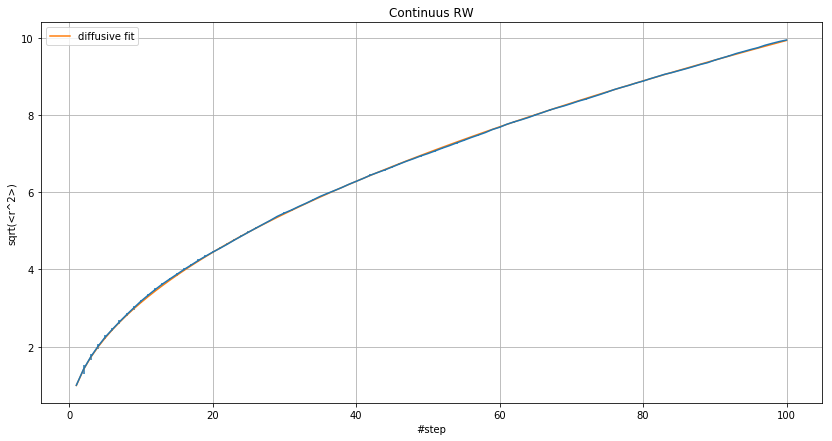

In [81]:
x, y, err = np.loadtxt("data/output_es02.2.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

p_opt, p_cov = curve_fit(diffusive,x,y) 
y_fit = diffusive(x,p_opt[0])
# Print k
print('k='+str(p_opt[0]))

plt.figure(figsize=(14,7))
plt.errorbar(x,y,yerr=err)
plt.plot(x,y_fit, label='diffusive fit')
plt.title("Continuus RW")
plt.xlabel('#step')
plt.ylabel('sqrt(<r^2>)')
plt.legend()
plt.grid(True)
plt.show()

From both graphs we can see that the RW follow a diffusive behavior as its $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ could be fitted by a function like $f(N)=k\sqrt{N}$, with $k=1.0059 $ for the discrete RW and $k=0.9932$ for the continuus RW.